In [1]:
# librerías default
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# librerías para ML
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('Electric_Vehicle_Population_Data.csv')

In [3]:
# Porcentaje de valores nulos

df.isnull().mean()*100

VIN (1-10)                                           0.000000
County                                               0.001605
City                                                 0.001605
State                                                0.000000
Postal Code                                          0.001605
Model Year                                           0.000000
Make                                                 0.000000
Model                                                0.000000
Electric Vehicle Type                                0.000000
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.000000
Electric Range                                       0.000000
Base MSRP                                            0.000000
Legislative District                                 0.215648
DOL Vehicle ID                                       0.000000
Vehicle Location                                     0.004281
Electric Utility                                     0.001605
2020 Cen

### Imputación de datos

Debido a que el porcentaje de valores nulos es muy bajo, el valor más grande es de 0.21 %, se procede a hacer CCA, donde se realiza dun dropna del dataframe

In [4]:
# Eliminar nulos

df = df.dropna()

In [5]:
# Evaluar nuevamente los nulos
df.isnull().mean()*100

VIN (1-10)                                           0.0
County                                               0.0
City                                                 0.0
State                                                0.0
Postal Code                                          0.0
Model Year                                           0.0
Make                                                 0.0
Model                                                0.0
Electric Vehicle Type                                0.0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0.0
Electric Range                                       0.0
Base MSRP                                            0.0
Legislative District                                 0.0
DOL Vehicle ID                                       0.0
Vehicle Location                                     0.0
Electric Utility                                     0.0
2020 Census Tract                                    0.0
dtype: float64

In [6]:
df.head()

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,WBY8P6C58K,King,Seattle,WA,98115.0,2019,BMW,I3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,153,0,43.0,259254397,POINT (-122.3008235 47.6862671),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303300e+10
1,5YJSA1DN4D,Kitsap,Bremerton,WA,98312.0,2013,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,208,69900,35.0,127420940,POINT (-122.6961203 47.5759584),PUGET SOUND ENERGY INC,5.303508e+10
2,5YJSA1E26J,King,Kent,WA,98042.0,2018,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,249,0,47.0,170287183,POINT (-122.1145138 47.3581107),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
3,WBY2Z2C54E,King,Bellevue,WA,98004.0,2014,BMW,I8,Plug-in Hybrid Electric Vehicle (PHEV),Not eligible due to low battery range,14,0,41.0,205545868,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10
4,5YJXCDE23J,King,Bellevue,WA,98004.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,41.0,237977386,POINT (-122.202397 47.619252),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303302e+10


### Codificación de variables categóricas

In [7]:
# Codificación de variables categoricas a utilizar

label_encoder = LabelEncoder()

df['Make'] = label_encoder.fit_transform(df['Make'])
df['Model'] = label_encoder.fit_transform(df['Model'])
df['Electric Vehicle Type'] = label_encoder.fit_transform(df['Electric Vehicle Type'])
df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] = label_encoder.fit_transform(df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'])

df[['Make','Model','Electric Vehicle Type', 'Clean Alternative Fuel Vehicle (CAFV) Eligibility']].head()

,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility
0,4,66,0,0
1,34,82,0,0
2,34,82,0,0
3,4,70,1,2
4,34,83,0,0


### Tratamiento de Outliers

En este caso la variable numérica que se va utilizar es 'Electric Range'

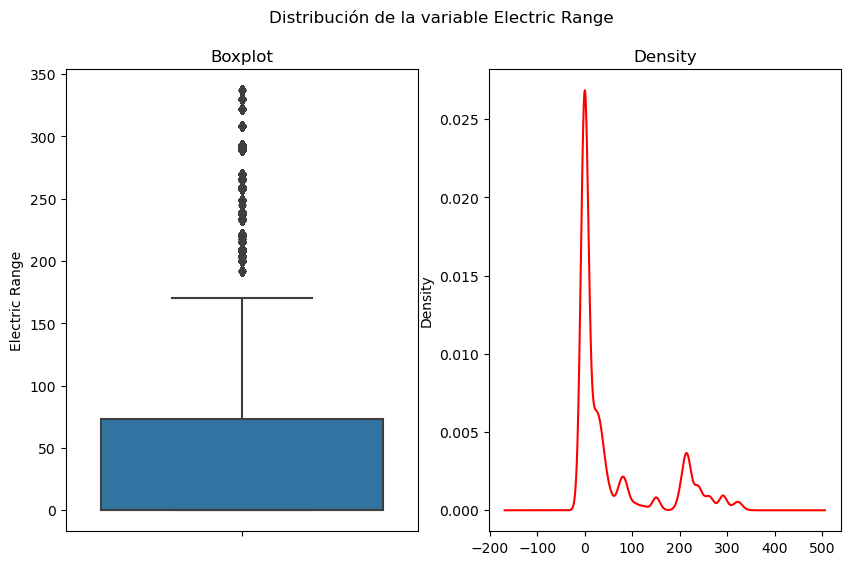

In [8]:
plt.figure(figsize=(10,6))
plt.suptitle(f"Distribución de la variable Electric Range")

plt.subplot(121)
plt.title('Boxplot')
sns.boxplot(y=df['Electric Range'])

plt.subplot(122)
plt.title('Density')
df['Electric Range'].plot.density(color='red')


plt.show()

In [9]:
# A traves del siguiente código se podria hacer el tratamiento de outliers de la variable, pero se decide no hacerlo debido a que los datos de rango de electricidad son
# alguna de las caracteristicas para ciertos vehiculos que nos podrian ayudar a precedir la variable que en este caso es el 'Electric Vehicule Type'

#IQR = df['Electric Range'].quantile(0.75) - df['Electric Range'].quantile(0.25)
#LI = df['Electric Range'].quantile(0.25) - 1.5*IQR
#LS = df['Electric Range'].quantile(0.75) + 1.5*IQR

#df['Electric Range'] = np.where(df['Electric Range'] > LS, LS, np.where(df['Electric Range'] < LI,LI,df['Electric Range']))


#plt.figure(figsize=(10,6))
#plt.suptitle(f"Distribución de la variable 'Electric Range' con tratamiento de outliers")

#plt.subplot(121)
#plt.title('Boxplot')
#sns.boxplot(y=df['Electric Range'])

#plt.subplot(122)
#plt.title('Density')
#df['Electric Range'].plot.density(color='red')


#plt.show()

### Transformación de variables numéricas

In [10]:
# Describir los datos de la variable

df['Electric Range'].describe()

count    186471.000000
mean         56.683731
std          90.771207
min           0.000000
25%           0.000000
50%           0.000000
75%          73.000000
max         337.000000
Name: Electric Range, dtype: float64

In [11]:
def plot_sensity_qq(df,variable):

    plt.figure(figsize=(10,6))

    plt.subplot(121)
    df[variable].hist(bins=30)
    plt.title(variable)

    plt.subplot(122)
    stats.probplot(df[variable], dist='norm', plot=plt)

    plt.show()

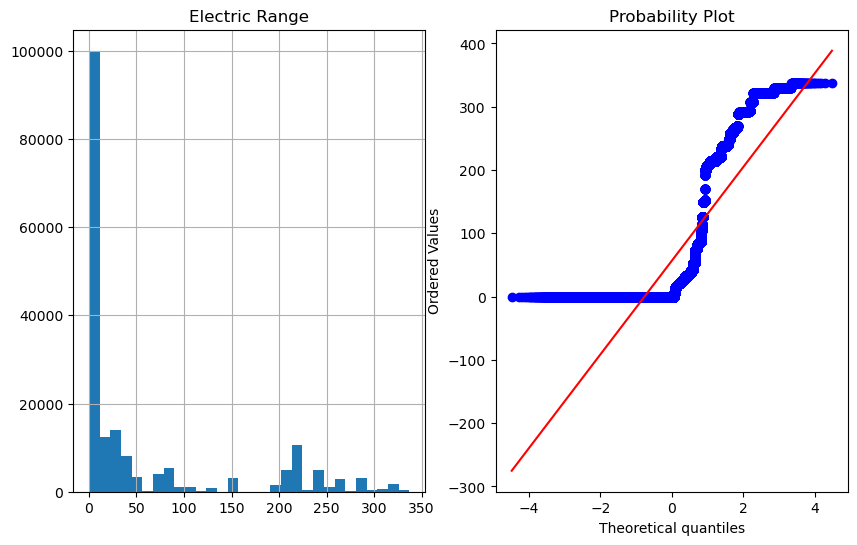

In [12]:
plot_sensity_qq(df,'Electric Range')

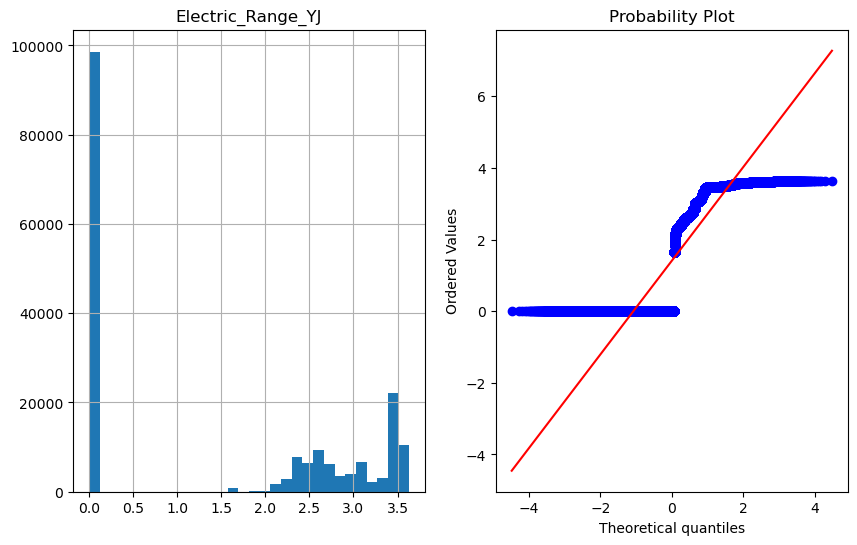

In [13]:
# Se realiza prueba con Yeo Johnson

df['Electric_Range_YJ'], lmbd = stats.yeojohnson(df['Electric Range'])
plot_sensity_qq(df,'Electric_Range_YJ')

In [24]:
# Dataframe para el modelo de clasificación

df_modelo = df[['Model Year', 'Make', 'Model', 'Electric Range','Electric Vehicle Type']]
df_modelo.head()

,Model Year,Make,Model,Electric Range,Electric Vehicle Type
0,2019,4,66,153,0
1,2013,34,82,208,0
2,2018,34,82,249,0
3,2014,4,70,14,1
4,2018,34,83,238,0


In [26]:
# Features Stores

df_modelo.to_csv('VehiculeData_Features.csv', index=False)

### Conlcusión transformación de variables numéricas

Se puede observar que no hubo una mejora en el comportamiento de su distribución, no tiende ser más igual a una distribución normal, por lo que se va utilizar la variable sin transformar para el modelo

### Selección de variables Features y Target

In [25]:
X = df[['Model Year', 'Make', 'Model', 'Electric Range']]
y = df['Electric Vehicle Type']

### Dividir data para el training y testing sets

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=2024, shuffle=True)

### Escalar las variables Features

In [16]:
std_scaler = StandardScaler()
std_scaler.fit(X_train)

X_std_train = std_scaler.transform(X_train)
X_std_test = std_scaler.transform(X_test)    # Evitamos fuga de datos entre train y test.

In [17]:
print(X_std_test)

[[-0.55615369  0.13208782 -0.03068268 -0.52677488  1.02823051 -0.12685888]
 [ 0.78204964  0.7363881   0.11064127 -0.52677488 -0.62395064 -0.12685888]
 [ 0.44749881  0.7363881   0.14597225 -0.52677488 -0.62395064 -0.12685888]
 ...
 [ 0.78204964  0.7363881   0.14597225 -0.52677488 -0.62395064 -0.12685888]
 [-0.22160286 -2.11245607  0.67593704  1.89834411 -0.40365982 -0.12685888]
 [ 0.78204964  0.04575921  0.39328915  1.89834411 -0.20539808 -0.12685888]]


In [18]:
print(X_std_train)

[[ 1.11660047  0.7363881   0.14597225 -0.52677488 -0.62395064 -0.12685888]
 [ 1.11660047 -0.73119829 -0.77263338  1.89834411 -0.34858711 -0.12685888]
 [ 0.78204964  0.99537393 -0.31333057 -0.52677488 -0.62395064 -0.12685888]
 ...
 [-1.55980619  0.7363881   0.07531028 -0.52677488  1.68910296 -0.12685888]
 [ 0.78204964 -0.90385551 -0.06601366 -0.52677488 -0.62395064 -0.12685888]
 [ 0.78204964 -0.73119829  1.98318353  1.89834411 -0.39264528 -0.12685888]]
